In [1]:
#import libraries
import numpy as np, pandas as pd

#Supress warnings
import warnings
warnings.filterwarnings("ignore")

#import library for plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
#reading companies file and fixing encoding
bike = pd.read_csv("day.csv", encoding = 'latin-1')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#converting dteday to datetime type
bike['dteday'] = bike['dteday'].astype('datetime64')

In [5]:
#checking info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [6]:
#Checking the descriptive statistics
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#bike dataframe shape
bike.shape

(730, 16)

In [8]:
#missing values percenatge
round(100*(bike.isnull().sum()/len(bike.index)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [9]:
#dropping extra columns
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
#We will create Dummy variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 
# Convert them to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [11]:
bike_new = pd.get_dummies(bike_new, drop_first=True)

#changes after the dummy variables creation.

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [12]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [14]:
#Splitting data into test and train
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 300)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 337 to 481
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [16]:
df_train.shape

(510, 30)

In [17]:
df_test.shape

(219, 30)

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 146 to 293
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null  

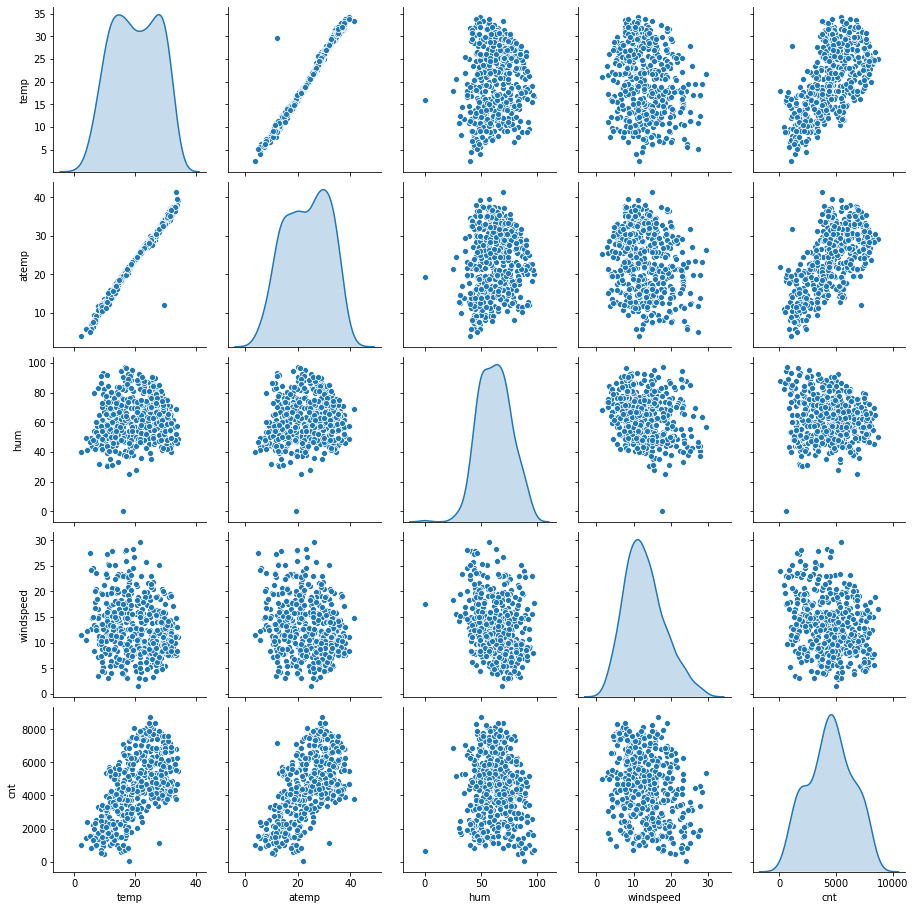

In [19]:
#EDA, creating a new dataframe of only numeric variables.

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'.

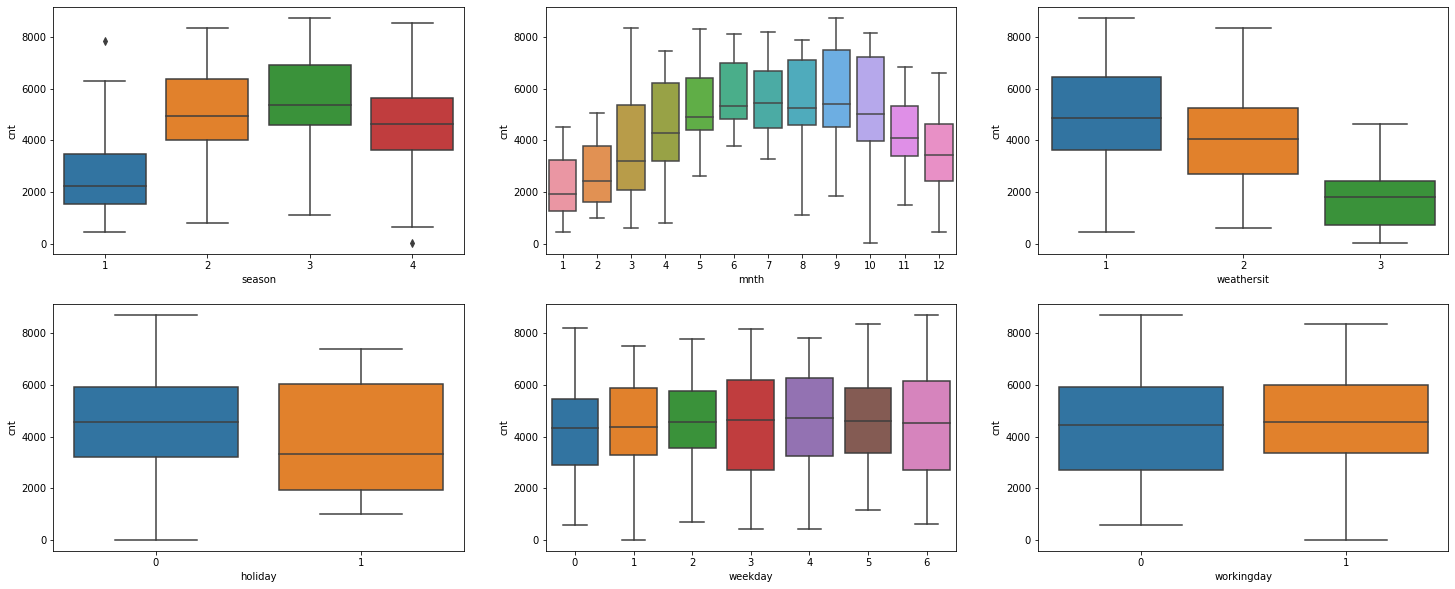

In [20]:
# boxplotting all categorical variables against the target variable 'cnt'.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

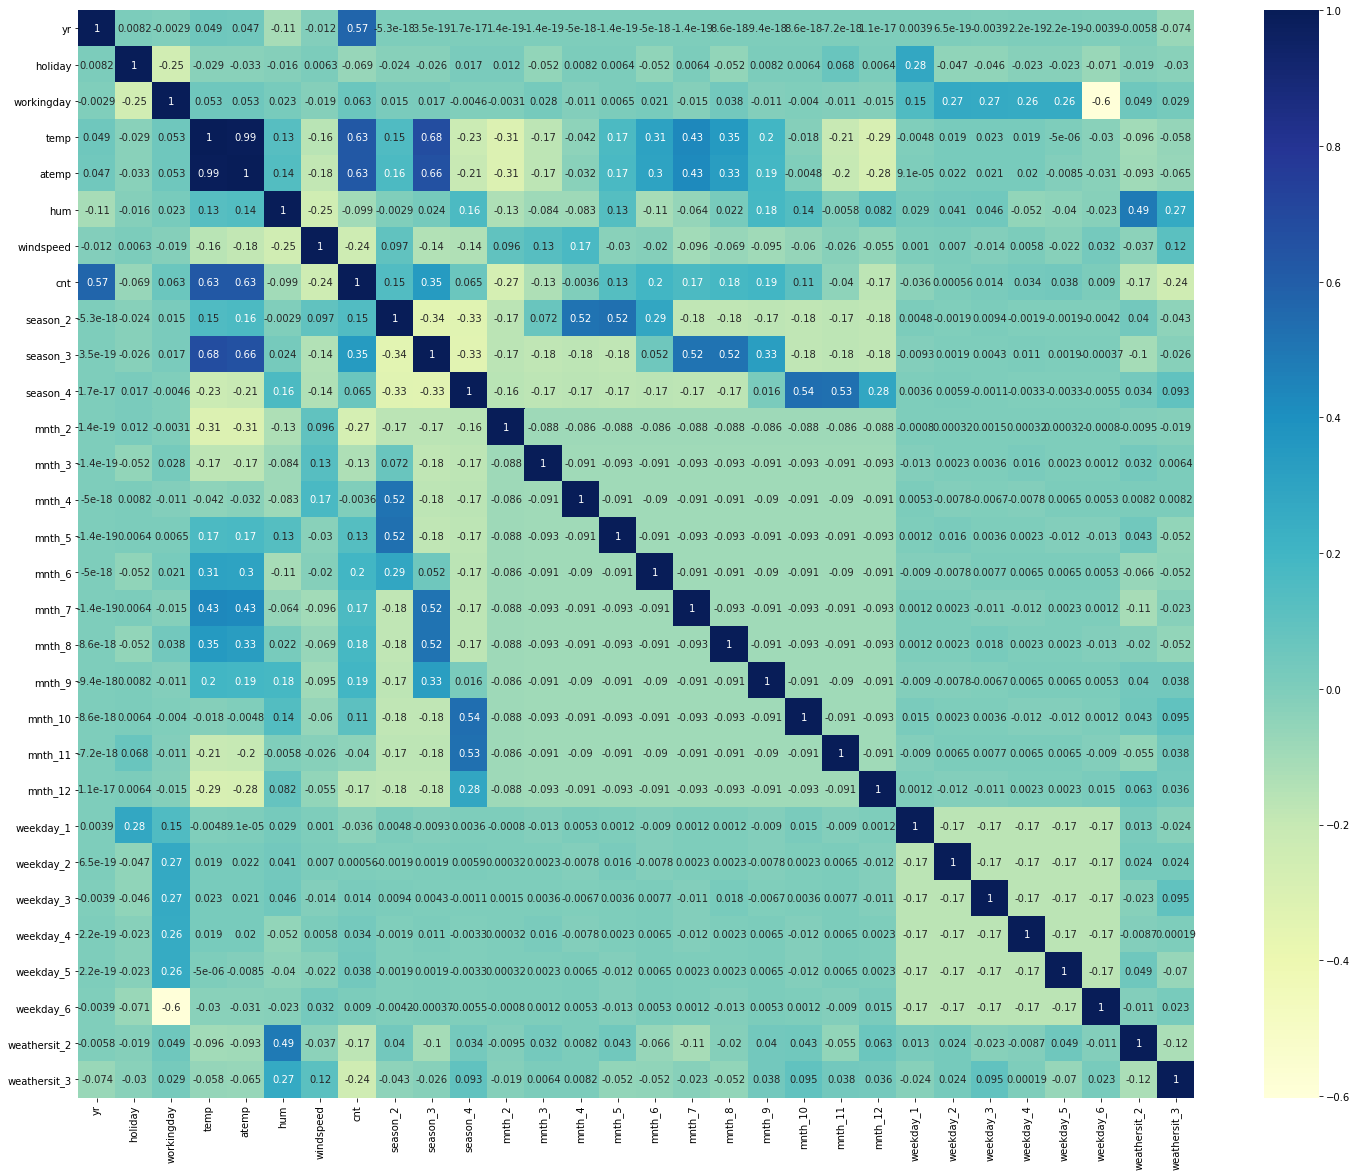

In [21]:
#correlation coefficients to check which variables are highly correlated.
plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

In [22]:
#RESCALING THE FEATURES
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
337,0,0,0,13.564153,17.45500,77.5833,5.625206,3485,0,0,...,0,1,0,0,0,0,0,0,0,0
547,1,0,1,32.048347,35.10190,44.7083,13.082889,6227,0,1,...,0,0,1,0,0,0,0,0,0,0
626,1,0,1,22.652500,27.02020,53.6667,14.416725,7591,0,1,...,0,0,0,0,1,0,0,0,0,0
309,0,0,0,14.281653,18.11790,73.4583,6.167631,3649,0,0,...,1,0,0,0,0,0,0,0,0,0
561,1,0,1,31.296653,36.20625,64.5000,11.000529,6830,0,1,...,0,0,1,0,0,0,0,0,0,0


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 337 to 481
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [25]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [26]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
337,0,0,0,0.350567,0.361341,0.799484,0.146877,0.398412,0,0,...,0,1,0,0,0,0,0,0,0,0
547,1,0,1,0.932261,0.833624,0.460712,0.412422,0.713875,0,1,...,0,0,1,0,0,0,0,0,0,0
626,1,0,1,0.636576,0.617334,0.553027,0.459915,0.870801,0,1,...,0,0,0,0,1,0,0,0,0,0
309,0,0,0,0.373147,0.379082,0.756977,0.166191,0.417280,0,0,...,1,0,0,0,0,0,0,0,0,0
561,1,0,1,0.908606,0.863180,0.664663,0.338275,0.783249,0,1,...,0,0,1,0,0,0,0,0,0,0


In [27]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.490196,0.027451,0.682353,0.559712,0.525171,0.642654,0.411024,0.513308,0.245098,0.262745,...,0.082353,0.092157,0.156863,0.139216,0.137255,0.139216,0.137255,0.149020,0.323529,0.031373
std,0.500395,0.163554,0.466018,0.239185,0.221526,0.147058,0.189497,0.222862,0.430568,0.440557,...,0.275172,0.289531,0.364028,0.346511,0.344454,0.346511,0.344454,0.356457,0.468282,0.174494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356482,0.335987,0.525440,0.268535,0.362143,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.561848,0.540014,0.641691,0.386730,0.522204,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.769634,0.709008,0.744633,0.513333,0.676542,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Creating Linear model

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

In [29]:
# import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
# running RFE with the output number of the variable 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)   
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', False, 2),
 ('mnth_4', False, 5),
 ('mnth_5', True, 1),
 ('mnth_6', False, 4),
 ('mnth_7', False, 14),
 ('mnth_8', False, 3),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 7),
 ('mnth_12', False, 8),
 ('weekday_1', False, 9),
 ('weekday_2', False, 15),
 ('weekday_3', False, 13),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [32]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_5', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [34]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building Linear Model using 'STATS MODEL'
Model 1

In [35]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,379.88
3,atemp,361.69
4,hum,17.40
7,season_3,7.40
5,windspeed,4.93
1,workingday,4.58
6,season_2,3.85
8,season_4,2.97
13,weathersit_2,2.10
0,yr,1.94


In [36]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [37]:
#check parameters

lr1.params

const           0.204530
yr              0.229781
workingday      0.046382
temp            0.370153
atemp           0.043027
hum            -0.164333
windspeed      -0.144716
season_2        0.133480
season_3        0.099098
season_4        0.158942
mnth_5          0.039177
mnth_9          0.108013
mnth_10         0.065021
weekday_6       0.063720
weathersit_2   -0.058460
weathersit_3   -0.226727
dtype: float64

In [38]:
#print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     200.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          5.63e-199
Time:                        19:03:59   Log-Likelihood:                 542.00
No. Observations:                 510   AIC:                            -1052.
Df Residuals:                     494   BIC:                            -984.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2045      0.028      7.432   

### Model 2 - 
Removing the variable 'atemp' based on its High p-value & High VIF

In [39]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [40]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.16
3,hum,17.02
6,season_3,7.35
4,windspeed,4.79
1,workingday,4.58
5,season_2,3.84
7,season_4,2.96
12,weathersit_2,2.10
0,yr,1.94
11,weekday_6,1.77


In [41]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [42]:
# Check the parameters obtained

lr2.params

const           0.204863
yr              0.229740
workingday      0.046337
temp            0.410053
hum            -0.163456
windspeed      -0.145926
season_2        0.133730
season_3        0.098522
season_4        0.159093
mnth_5          0.039027
mnth_9          0.108137
mnth_10         0.065249
weekday_6       0.063703
weathersit_2   -0.058577
weathersit_3   -0.226978
dtype: float64

In [43]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     215.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.00e-200
Time:                        19:03:59   Log-Likelihood:                 541.94
No. Observations:                 510   AIC:                            -1054.
Df Residuals:                     495   BIC:                            -990.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2049      0.027      7.455   

### Model 3
Removing the variable 'hum' based on its Very High 'VIF' value. - Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'. 

In [44]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [45]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,17.89
5,season_3,7.09
3,windspeed,4.40
1,workingday,4.19
4,season_2,3.78
6,season_4,2.86
0,yr,1.94
10,weekday_6,1.67
9,mnth_10,1.63
7,mnth_5,1.61


In [46]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [47]:
# Check the parameters obtained

lr3.params

const           0.110468
yr              0.233941
workingday      0.049745
temp            0.381169
windspeed      -0.120774
season_2        0.140616
season_3        0.106584
season_4        0.154741
mnth_5          0.029029
mnth_9          0.098692
mnth_10         0.063099
weekday_6       0.066318
weathersit_2   -0.086113
weathersit_3   -0.276732
dtype: float64

In [48]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     221.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          5.77e-197
Time:                        19:03:59   Log-Likelihood:                 531.60
No. Observations:                 510   AIC:                            -1035.
Df Residuals:                     496   BIC:                            -975.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1105      0.018      6.056   

### Model 4
Removing the variable 'season3' based on its Very High 'VIF' value. - Even though the VIF of season3 is second highest, we decided to drop 'season3' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'. 

In [49]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.88
1,workingday,4.16
3,windspeed,4.16
4,season_2,2.09
5,season_4,1.95
0,yr,1.92
9,weekday_6,1.67
8,mnth_10,1.59
6,mnth_5,1.57
10,weathersit_2,1.51


In [51]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [52]:
# Check the parameters obtained

lr4.params

const           0.093918
yr              0.231167
workingday      0.049414
temp            0.512988
windspeed      -0.131393
season_2        0.087272
season_4        0.118849
mnth_5          0.014877
mnth_9          0.113723
mnth_10         0.047924
weekday_6       0.069232
weathersit_2   -0.088114
weathersit_3   -0.275907
dtype: float64

In [53]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.73e-192
Time:                        19:03:59   Log-Likelihood:                 517.67
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     497   BIC:                            -954.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0939      0.018      5.090   

### Model 5
Removing the variable 'mnth_5' based on its Very High p-value.

In [54]:
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.81
1,workingday,4.16
3,windspeed,4.11
5,season_4,1.95
0,yr,1.92
8,weekday_6,1.67
7,mnth_10,1.59
4,season_2,1.58
9,weathersit_2,1.50
6,mnth_9,1.25


In [56]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [57]:
# Check the parameters obtained

lr5.params

const           0.094022
yr              0.231117
workingday      0.049144
temp            0.514470
windspeed      -0.133256
season_2        0.092256
season_4        0.119009
mnth_9          0.113230
mnth_10         0.047609
weekday_6       0.069024
weathersit_2   -0.087657
weathersit_3   -0.276321
dtype: float64

In [58]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     246.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.50e-193
Time:                        19:03:59   Log-Likelihood:                 517.28
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     498   BIC:                            -959.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0940      0.018      5.097   

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model.

### Final Model 

#### Hypothesis Testing:¶
Hypothesis testing states that:

𝐻0:𝐵1=𝐵2=...=𝐵𝑛=0 

𝐻1:  at least one  𝐵𝑖!=0 

From lr6 model summary, it is shown that all our coefficients are not equal to zero. which means We can REJECT the NULL HYPOTHESIS.

F-statistic: 246.1

Prob (F-statistic): 2.50e-193

The F-Statistics value of 246 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### VALIDATE ASSUMPTIONS

Residual Analysis Of Training Data

In [59]:
y_train_pred = lr5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

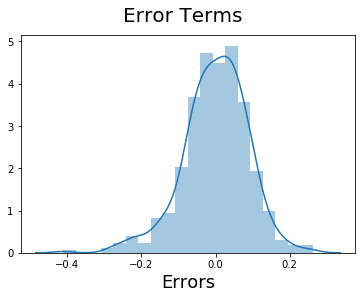

In [60]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                     

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

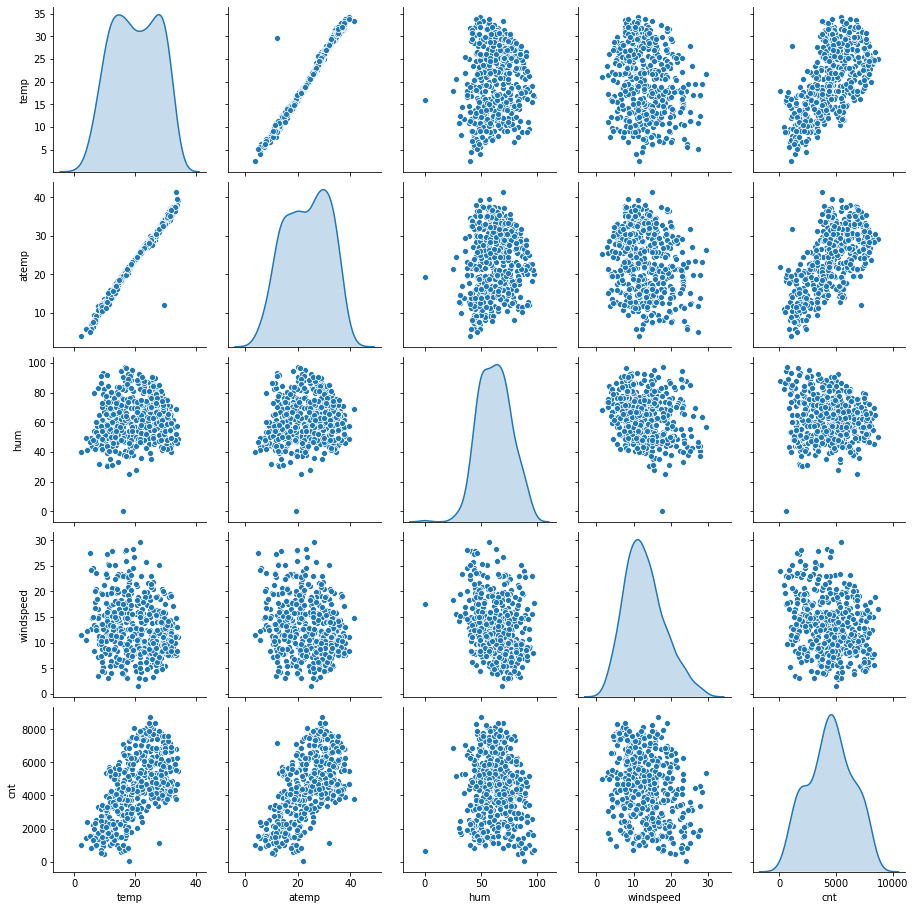

In [61]:
#linear relationship between X and Y
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

 Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’. 

### There is No Multicollinearity between the predictor variables

In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.81
1,workingday,4.16
3,windspeed,4.11
5,season_4,1.95
0,yr,1.92
8,weekday_6,1.67
7,mnth_10,1.59
4,season_2,1.58
9,weathersit_2,1.50
6,mnth_9,1.25


From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5. 

### PREDICTION USING FINAL MODEL
Making predictions using the final model 

In [63]:
# Apply scaler() to all numeric variables in test dataset. 

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [64]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
146,0,0,1,0.803235,0.746604,0.673679,0.520759,0.535780,1,0,...,0,0,0,0,0,0,1,0,0,0
263,0,0,1,0.691412,0.630888,0.927436,0.176569,0.498159,0,1,...,0,0,0,0,1,0,0,0,1,0
426,1,0,0,0.458090,0.447507,0.640189,0.330861,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
552,1,0,0,1.035482,0.971286,0.507084,0.336765,0.554303,0,1,...,0,0,0,0,0,0,0,1,0,0
302,0,0,0,0.335515,0.324179,0.642765,0.367929,0.380695,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.525114,0.031963,0.684932,0.569135,0.536613,0.656808,0.378012,0.522974,0.269406,0.242009,...,0.082192,0.068493,0.114155,0.150685,0.150685,0.150685,0.150685,0.132420,0.369863,0.022831
std,0.500513,0.176306,0.465607,0.228218,0.208893,0.145989,0.172753,0.223252,0.444668,0.429281,...,0.275286,0.253169,0.318728,0.358561,0.358561,0.358561,0.358561,0.339723,0.483873,0.149707
min,0.000000,0.000000,0.000000,0.048245,0.026455,0.193646,0.057872,0.047055,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363471,0.349520,0.554315,0.266299,0.361194,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.595717,0.573409,0.661228,0.357540,0.520709,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.766677,0.707754,0.758909,0.484403,0.709388,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.035482,1.019437,1.002146,1.157215,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 146 to 293
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [67]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)

X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 146 to 293
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   mnth_10       219 non-null    uint8  
 9   weekday_6     219 non-null    uint8  
 10  weathersit_2  219 non-null    uint8  
 11  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [68]:
# Making predictions using the final model (lr6)

y_pred = lr5.predict(X_test_lm5)

#### MODEL EVALUATION

Text(0, 0.5, 'y_pred')

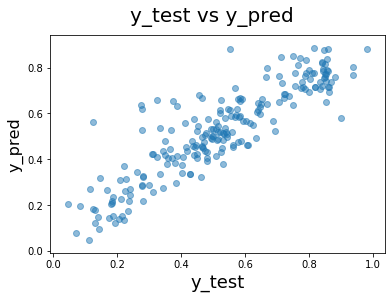

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 

In [70]:
# R^2 Value for TEST
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7858050057712725

#### Adjusted R^2 Value for TEST

Formula for Adjusted R^2

𝑅2𝑎𝑑𝑗.=1−(1−𝑅2)∗𝑛−1𝑛−𝑝−1

In [71]:
r2=0.7858050057712725

In [72]:
X_test.shape

(219, 11)

In [73]:
# n is number of rows in X

n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7744226630827895

### FINAL REPORT

The top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.5145’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5145 units.

Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.2763’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2763 units.

Year (yr) - A coefficient value of ‘0.2311’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2311 units.

#### SO IT IS RECOMMENDED TO GIVE THESE VARIABLES TO ACHIEVE MAXIMUM BOOKING. 

## End